In [4]:
import pandas as pd 
df = pd.read_csv("./Data/nutrition.csv", index_col=0)
df.head(20)

name serving_size  calories total_fat saturated_fat  \
0               Cornstarch        100 g       381      0.1g           NaN   
1             Nuts, pecans        100 g       691       72g          6.2g   
2            Eggplant, raw        100 g        25      0.2g           NaN   
3           Teff, uncooked        100 g       367      2.4g          0.4g   
4          Sherbet, orange        100 g       144        2g          1.2g   
5         Cauliflower, raw        100 g        25      0.3g          0.1g   
6         Taro leaves, raw        100 g        42      0.7g          0.2g   
7        Lamb, raw, ground        100 g       282       23g           10g   
8        Cheese, camembert        100 g       300       24g           15g   
9       Vegetarian fillets        100 g       290       18g          2.8g   
10     PACE, Picante Sauce        100 g        25        0g           NaN   
11     Goji berries, dried        100 g       349      0.4g           NaN   
12    Mango nectar, canned        100 g        51      0.1g           NaN   
13    Crackers, rusk toast        100 g       407      7.2g          1.4g   
14   Chicken, boiled, feet        100 g       215       15g          3.9g   
15   Quail, raw, meat only        100 g       134      4.5g          1.3g   
16  Pie, lemon, fried pies        100 g       316       16g          2.5g   
17  Peppers, raw, jalapeno        100 g        29      0.4g          0.1g   
18  Winged bean tuber, raw        100 g       148      0.9g          0.2g   
19  Salami, turkey, cooked        100 g       172      9.2g          2.8g   

   cholesterol      sodium  choline      folate folic_acid  ...      fat  \
0            0     9.00 mg   0.4 mg    0.00 mcg   0.00 mcg  ...   0.05 g   
1            0     0.00 mg  40.5 mg   22.00 mcg   0.00 mcg  ...  71.97 g   
2            0     2.00 mg   6.9 mg   22.00 mcg   0.00 mcg  ...   0.18 g   
3            0    12.00 mg  13.1 mg           0          0  ...   2.38 g   
4          1mg    46.00 mg   7.7 mg    4.00 mcg   0.00 mcg  ...   2.00 g   
5            0    30.00 mg  44.3 mg   57.00 mcg   0.00 mcg  ...   0.28 g   
6            0     3.00 mg  12.8 mg  126.00 mcg   0.00 mcg  ...   0.74 g   
7         73mg    59.00 mg  69.3 mg   18.00 mcg   0.00 mcg  ...  23.41 g   
8         72mg   842.00 mg  15.4 mg   62.00 mcg   0.00 mcg  ...  24.26 g   
9            0   490.00 mg  82.0 mg  102.00 mcg   0.00 mcg  ...  18.00 g   
10           0   781.00 mg        0           0          0  ...   0.00 g   
11           0   298.00 mg        0           0          0  ...   0.39 g   
12           0     5.00 mg   1.5 mg    7.00 mcg   0.00 mcg  ...   0.06 g   
13        78mg   253.00 mg        0   87.00 mcg  23.00 mcg  ...   7.20 g   
14        84mg    67.00 mg  13.3 mg   86.00 mcg   0.00 mcg  ...  14.60 g   
15        70mg    51.00 mg        0    7.00 mcg   0.00 mcg  ...   4.53 g   
16           0   374.00 mg        0   18.00 mcg  15.00 mcg  ...  16.10 g   
17           0     3.00 mg   7.5 mg   27.00 mcg   0.00 mcg  ...   0.37 g   
18           0    35.00 mg        0   19.00 mcg   0.00 mcg  ...   0.90 g   
19        76mg  1107.00 mg  53.1 mg   10.00 mcg   0.00 mcg  ...   9.21 g   

   saturated_fatty_acids monounsaturated_fatty_acids  \
0                0.009 g                     0.016 g   
1                6.180 g                    40.801 g   
2                0.034 g                     0.016 g   
3                0.449 g                     0.589 g   
4                1.160 g                     0.530 g   
5                0.130 g                     0.034 g   
6                0.151 g                     0.060 g   
7               10.190 g                     9.600 g   
8               15.259 g                     7.023 g   
9                2.849 g                     4.376 g   
10                     0                           0   
11               0.000 g                           0   
12               0.014 g                     0.022 g   
13               1.376 

In [5]:
df.isnull().sum()

name                0
serving_size        0
calories            0
total_fat           0
saturated_fat    1590
                 ... 
alcohol             0
ash                 0
caffeine            0
theobromine         0
water               0
Length: 76, dtype: int64

In [8]:
df.dtypes

name             object
serving_size     object
calories          int64
total_fat        object
saturated_fat    object
                  ...  
alcohol          object
ash              object
caffeine         object
theobromine      object
water            object
Length: 76, dtype: object

In [9]:
# Removing non-numeric characters (e.g., 'g' or '%') from 'saturated_fat' and converting to float
df['saturated_fat'] = df['saturated_fat'].replace(r'\D', '', regex=True).astype(float)

# filling the missing values with the median
df['saturated_fat'] = df['saturated_fat'].fillna(df['saturated_fat'].median())


In [11]:
import pandas as pd

# Selecting relevant columns
df_nutri = df[['calories', 'total_fat', 'saturated_fat', 'fat', 'cholesterol', 'protein', 
               'carbohydrate', 'sugars', 'fiber', 'sodium', 'potassium', 'water']]

# Convert columns to string before using str.replace
df_nutri['total_fat'] = pd.to_numeric(df_nutri['total_fat'].astype(str).str.replace('g', '', regex=False), errors='coerce')
df_nutri['saturated_fat'] = pd.to_numeric(df_nutri['saturated_fat'].astype(str).str.replace('g', '', regex=False), errors='coerce')
df_nutri['fat'] = pd.to_numeric(df_nutri['fat'].astype(str).str.replace('g', '', regex=False), errors='coerce')
df_nutri['cholesterol'] = pd.to_numeric(df_nutri['cholesterol'].astype(str).str.replace('mg', '', regex=False), errors='coerce')
df_nutri['protein'] = pd.to_numeric(df_nutri['protein'].astype(str).str.replace('g', '', regex=False), errors='coerce')
df_nutri['carbohydrate'] = pd.to_numeric(df_nutri['carbohydrate'].astype(str).str.replace('g', '', regex=False), errors='coerce')
df_nutri['sugars'] = pd.to_numeric(df_nutri['sugars'].astype(str).str.replace('g', '', regex=False), errors='coerce')
df_nutri['fiber'] = pd.to_numeric(df_nutri['fiber'].astype(str).str.replace('g', '', regex=False), errors='coerce')
df_nutri['sodium'] = pd.to_numeric(df_nutri['sodium'].astype(str).str.replace('mg', '', regex=False), errors='coerce')
df_nutri['potassium'] = pd.to_numeric(df_nutri['potassium'].astype(str).str.replace('mg', '', regex=False), errors='coerce')
df_nutri['water'] = pd.to_numeric(df_nutri['water'].astype(str).str.replace('g', '', regex=False), errors='coerce')


df_nutri = df_nutri.dropna()


print(df_nutri.info())
print(df_nutri.describe())


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8789 entries, 0 to 8788
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   calories       8789 non-null   int64  
 1   total_fat      8789 non-null   float64
 2   saturated_fat  8789 non-null   float64
 3   fat            8789 non-null   float64
 4   cholesterol    8789 non-null   int64  
 5   protein        8789 non-null   float64
 6   carbohydrate   8789 non-null   float64
 7   sugars         8789 non-null   float64
 8   fiber          8789 non-null   float64
 9   sodium         8789 non-null   float64
 10  potassium      8789 non-null   float64
 11  water          8789 non-null   float64
dtypes: float64(10), int64(2)
memory usage: 892.6 KB
None
          calories    total_fat  saturated_fat          fat  cholesterol  \
count  8789.000000  8789.000000    8789.000000  8789.000000  8789.000000   
mean    226.283878    10.556855      21.859142    10.550794    38.7

C:\Users\Hala\AppData\Local\Temp\ipykernel_29160\1345582474.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nutri['total_fat'] = pd.to_numeric(df_nutri['total_fat'].astype(str).str.replace('g', '', regex=False), errors='coerce')
C:\Users\Hala\AppData\Local\Temp\ipykernel_29160\1345582474.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_nutri['saturated_fat'] = pd.to_numeric(df_nutri['saturated_fat'].astype(str).str.replace('g', '', regex=False), errors='coerce')
C:\Users\Hala\AppData\Local\Tem

In [12]:
# Updating column names to include units
df_nutri.columns = [
    'calories',
    'total_fat (g)',            # grams for fat
    'saturated_fat (g)',        # grams for saturated fat
    'fat (g)',                  # grams for fat
    'cholesterol (mg)',         # milligrams for cholesterol
    'protein (g)',              # grams for protein
    'carbohydrate (g)',         # grams for carbohydrate
    'sugars (g)',               # grams for sugars
    'fiber (g)',                # grams for fiber
    'sodium (mg)',              # milligrams for sodium
    'potassium (mg)',           # milligrams for potassium
    'water (g)'                 # grams for water
]

# Checking the new column names
print(df_nutri.columns)


Index(['calories', 'total_fat (g)', 'saturated_fat (g)', 'fat (g)',
       'cholesterol (mg)', 'protein (g)', 'carbohydrate (g)', 'sugars (g)',
       'fiber (g)', 'sodium (mg)', 'potassium (mg)', 'water (g)'],
      dtype='object')


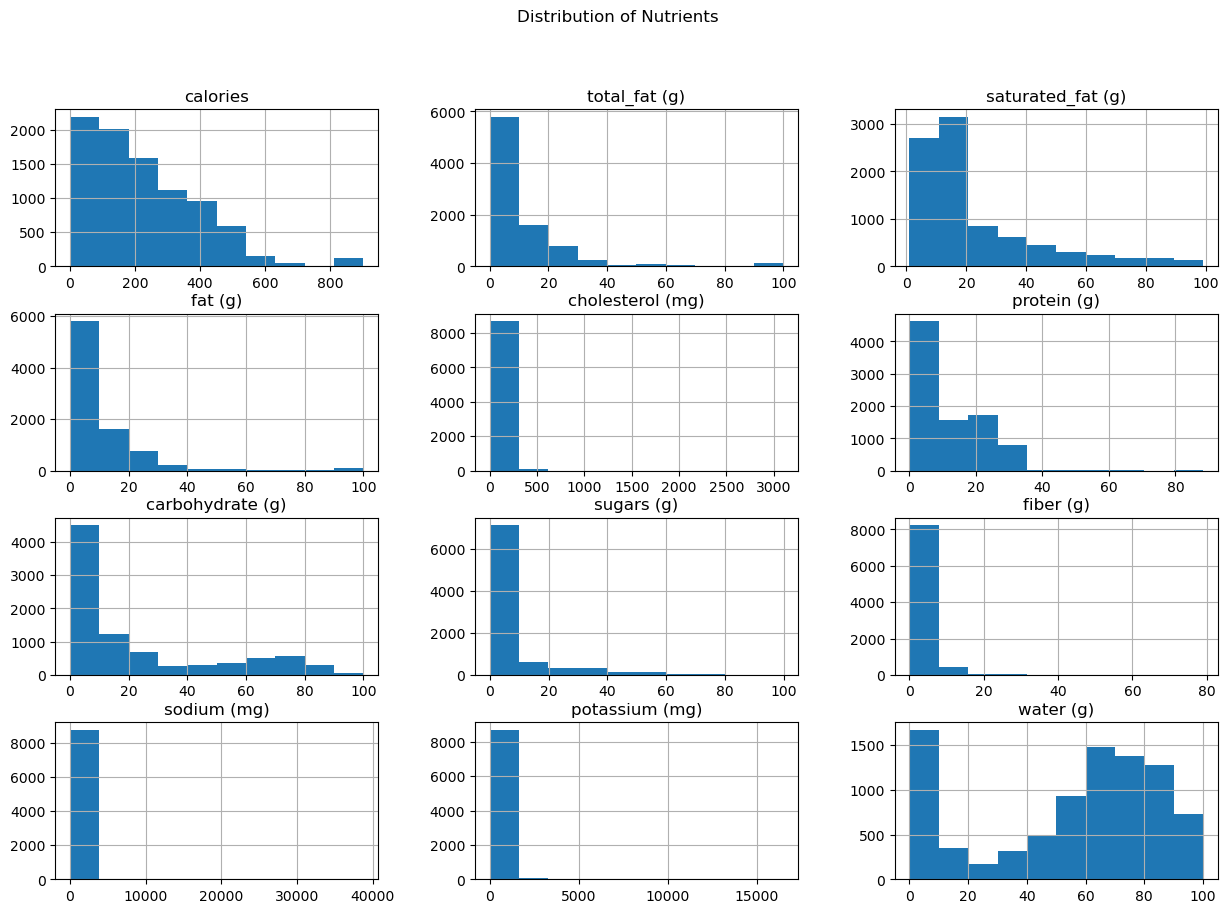

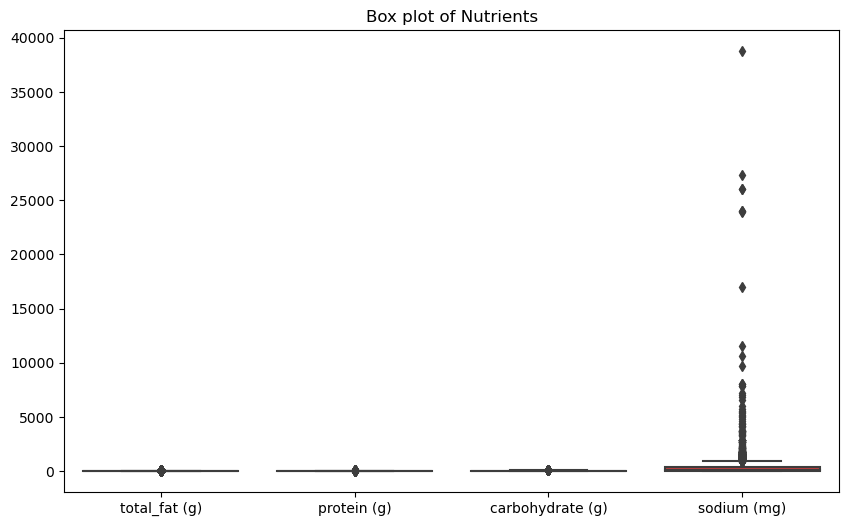

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms
df_nutri.hist(figsize=(15, 10))
plt.suptitle('Distribution of Nutrients')
plt.show()

# Box plot for selected nutrients 
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_nutri[['total_fat (g)', 'protein (g)', 'carbohydrate (g)', 'sodium (mg)']])
plt.title('Box plot of Nutrients')
plt.show()




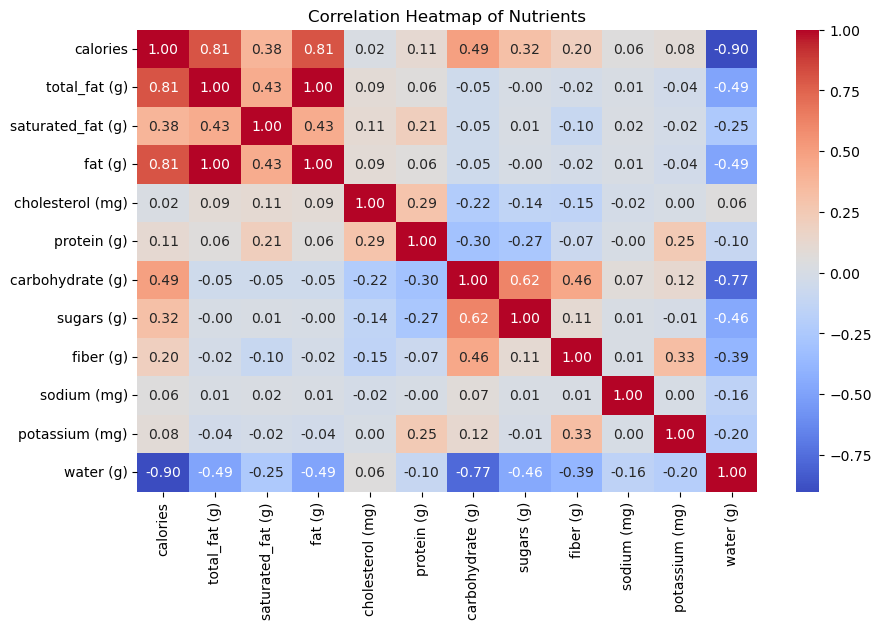

In [17]:
plt.figure(figsize=(10, 6))
correlation_matrix = df_nutri.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Nutrients')
plt.show()


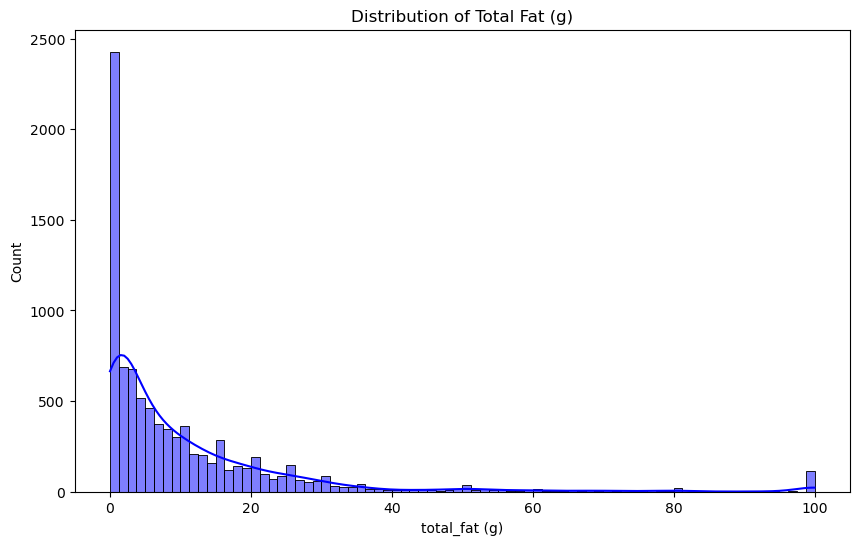

In [18]:
# Distribution plot for total fat
plt.figure(figsize=(10, 6))
sns.histplot(df_nutri['total_fat (g)'], kde=True, color='blue')
plt.title('Distribution of Total Fat (g)')
plt.show()




In [21]:
from scipy import stats
import numpy as np
# Z-score method for outlier detection
z_scores = stats.zscore(df_nutri[['total_fat (g)', 'protein (g)', 'carbohydrate (g)', 'sodium (mg)']])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)  # Z-score greater than 3 is often considered an outlier
df_outliers = df_nutri[outliers]
print(df_outliers)

Empty DataFrame
Columns: [calories, total_fat (g), saturated_fat (g), fat (g), cholesterol (mg), protein (g), carbohydrate (g), sugars (g), fiber (g), sodium (mg), potassium (mg), water (g)]
Index: []


In [22]:
# Creating a new feature: Protein to Fat ratio
df_nutri['protein_to_fat'] = df_nutri['protein (g)'] / df_nutri['total_fat (g)']


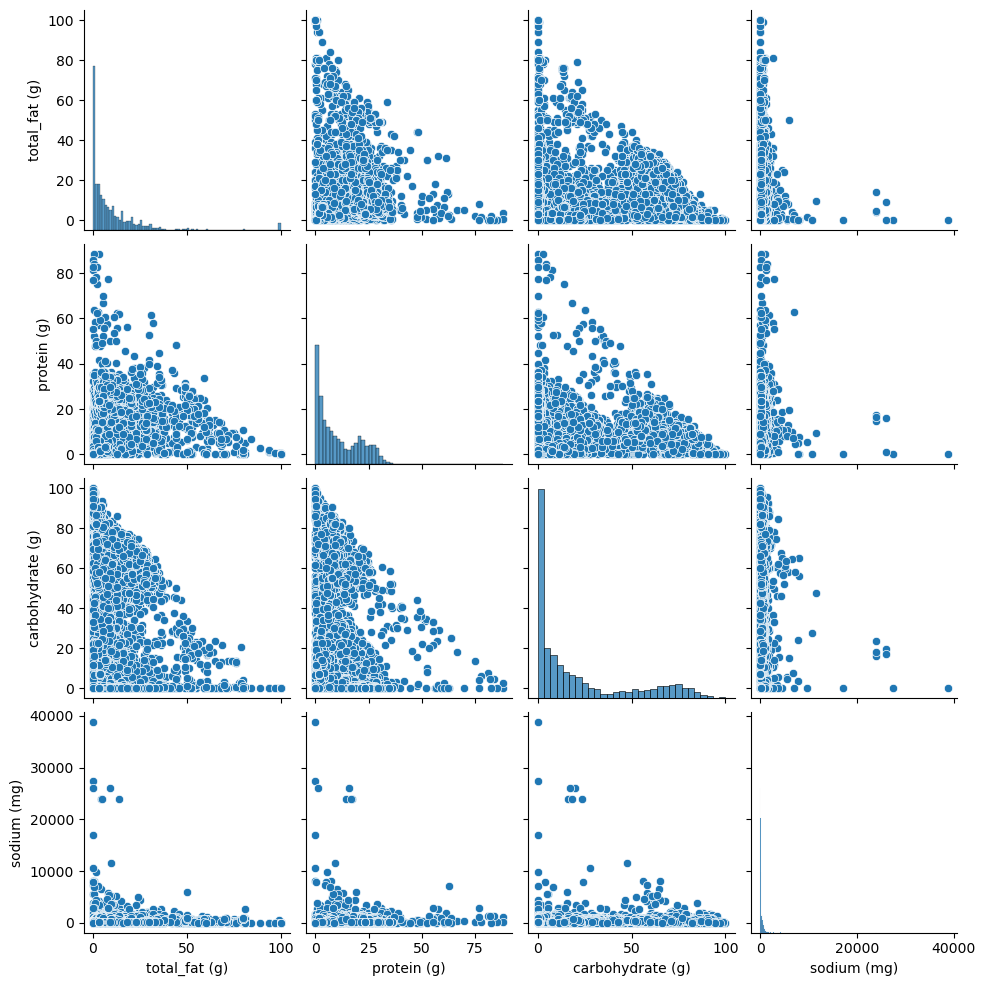

In [23]:
# Pair plot for selected nutrients
sns.pairplot(df_nutri[['total_fat (g)', 'protein (g)', 'carbohydrate (g)', 'sodium (mg)']])
plt.show()


In [24]:
from sklearn.preprocessing import StandardScaler

# Select numeric columns for normalization
numeric_cols = ['calories', 'total_fat (g)', 'saturated_fat (g)', 'fat (g)',
                'cholesterol (mg)', 'protein (g)', 'carbohydrate (g)', 'sugars (g)',
                'fiber (g)', 'sodium (mg)', 'potassium (mg)', 'water (g)']

# Initialize the StandardScaler
scaler = StandardScaler()

# Normalize the data using Z-score normalization
df_nutri[numeric_cols] = scaler.fit_transform(df_nutri[numeric_cols])

# Display the first few rows of the normalized data
print(df_nutri.head())


   calories  total_fat (g)  saturated_fat (g)   fat (g)  cholesterol (mg)  \
0  0.910886      -0.661100          -0.317098 -0.664020         -0.329973   
1  2.736001       3.884542           1.855710  3.883857         -0.329973   
2 -1.185052      -0.654778          -0.317098 -0.655800         -0.329973   
3  0.828461      -0.515690          -0.825627 -0.516682         -0.329973   
4 -0.484444      -0.540979          -0.455788 -0.540711         -0.321452   

   protein (g)  carbohydrate (g)  sugars (g)  fiber (g)  sodium (mg)  \
0    -1.052765          2.536175   -0.492509  -0.267062    -0.316614   
1    -0.206611         -0.303026   -0.203111   1.770915    -0.326197   
2    -0.984389         -0.595712   -0.235185   0.224863    -0.324068   
3     0.185601          1.870846   -0.358380   1.396115    -0.313420   
4    -0.972993          0.303619    1.280330  -0.173362    -0.277218   

   potassium (mg)  water (g)  protein_to_fat  
0       -0.706073  -1.488145        2.600000  
1        0

In [33]:
# Drop rows where the 'protein_to_fat' column has null values
df_nutri = df_nutri.dropna(subset=['protein_to_fat'])
df_nutri = df_nutri[~np.isinf(df_nutri).any(axis=1)]

In [34]:
df_nutri.isnull().sum()

calories             0
total_fat (g)        0
saturated_fat (g)    0
fat (g)              0
cholesterol (mg)     0
protein (g)          0
carbohydrate (g)     0
sugars (g)           0
fiber (g)            0
sodium (mg)          0
potassium (mg)       0
water (g)            0
protein_to_fat       0
dtype: int64

In [39]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def recommend_food(user_input, food_data, similarity_matrix, top_n=5):
    """
    Recommend foods based on user input by comparing with the cosine similarity matrix.
    
    user_input: numpy array or list of nutrient values [fat, protein, carbohydrate, sodium]
    food_data: DataFrame containing the foods and their nutritional information
    similarity_matrix: Precomputed cosine similarity matrix
    top_n: Number of top recommendations to return
    """
    # Reshape user_input to match the expected shape for cosine_similarity
    user_input_reshaped = np.array(user_input).reshape(1, -1)
    
    # Calculate cosine similarity between user input and food_data
    similarities = cosine_similarity(user_input_reshaped, food_data)
    
    # Get indices of the most similar foods (highest similarity)
    sorted_indices = np.argsort(similarities[0])[::-1][:top_n]
    
    # Return the top N most similar foods
    return food_data.iloc[sorted_indices]

# Example user input: [fat, protein, carbohydrate, sodium]
user_input = [10, 20, 30, 100]  # Example values for fat, protein, carbohydrate, sodium
top_n = 5

# Assuming df_nutri is your DataFrame with the food data
recommended_foods = recommend_food(user_input, df_nutri[['total_fat (g)', 'protein (g)', 'carbohydrate (g)', 'sodium (mg)']], similarity_matrix, top_n)
print(recommended_foods)


      total_fat (g)  protein (g)  carbohydrate (g)  sodium (mg)
149        0.217682     0.200796          1.011494     2.726508
7380       0.028016     0.073541          0.035874     0.289242
1034       0.280903     0.035554          1.299779     4.028725
6739       0.533790     0.684177          1.160037     2.379392
5878       0.028016     0.037453          0.213026     0.431921
